In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

# Operadores Locales o espaciales

## Convolución y correlación

In [2]:
from scipy.ndimage import convolve, correlate, uniform_filter, gaussian_filter, median_filter

En primer lugar defiimos una imagen que consiste únicamente en un impulso discreto. Al pasarla por un filtro lineal nos proporcionará la respuesta al impulso

In [3]:
image = np.zeros((5,5), dtype='int32')
image[2,2] = 1
print(image)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


Utilizamos un filtro cuya respuesta al impulso está definida en el array w

In [4]:
w = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(w)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Primero vemos el resultado de la convolución

In [5]:
print(convolve(image, w))

[[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 0 0 0 0]]


Y seguidamente el de la convolución.

In [6]:
print(correlate(image, w))

[[0 0 0 0 0]
 [0 9 8 7 0]
 [0 6 5 4 0]
 [0 3 2 1 0]
 [0 0 0 0 0]]


Es muy importante ganar intuición modificando la imagen de entrada, por ejemplo, poniendo dos impulsos, haciéndola de mayor tamño (para evitar efectos de bordes),... 

## Filtro de suavizado

In [7]:
image = np.zeros((5,5))
image[2,2] = 1
print(image)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [8]:
w = (1/9)*np.ones((3,3))
print(w)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [9]:
print(convolve(image, w))

[[0.         0.         0.         0.         0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.         0.         0.         0.        ]]


Existe una función específica para facilitar el filtrado

In [10]:
print(uniform_filter(image, 3))

[[0.         0.         0.         0.         0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.         0.         0.         0.        ]]


### Ejemplos con imagenes reales

formato: TIFF
(ancho, alto) = (500, 500)
modo:  L


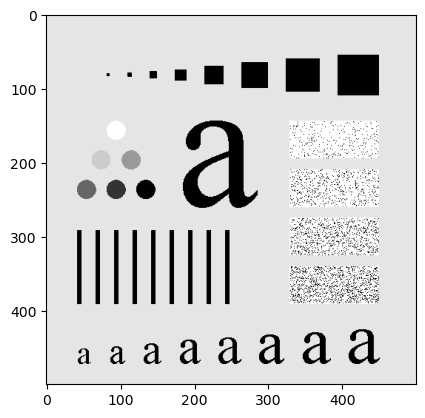

In [11]:
file = 'images/blurring_pattern.tif'
img  = Image.open(file)

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

plt.imshow(img, cmap='gray')

Text(0.5, 1.0, 'Tamaño del filtro: 5')

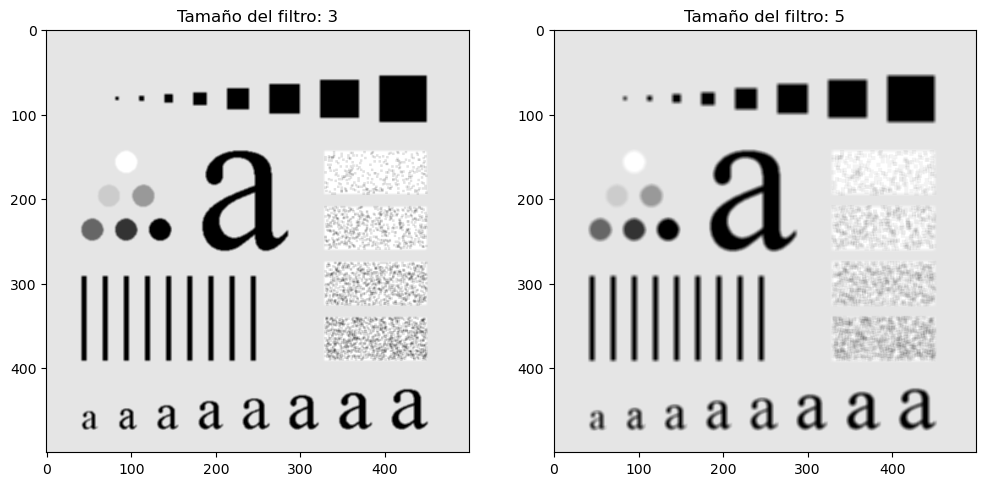

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(uniform_filter(img, 3), cmap='gray')
plt.title('Tamaño del filtro: 3')

plt.subplot(122)
plt.imshow(uniform_filter(img, 5), cmap='gray')
plt.title('Tamaño del filtro: 5')

Text(0.5, 1.0, 'Tamaño del filtro: 15')

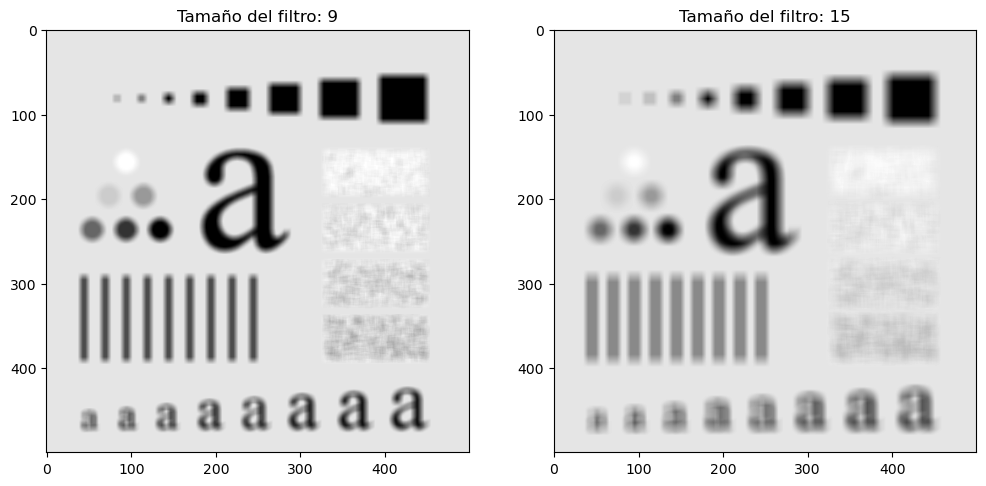

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(uniform_filter(img, 9), cmap='gray')
plt.title('Tamaño del filtro: 9')

plt.subplot(122)
plt.imshow(uniform_filter(img, 15), cmap='gray')
plt.title('Tamaño del filtro: 15')

Text(0.5, 1.0, 'Tamaño del filtro: 35')

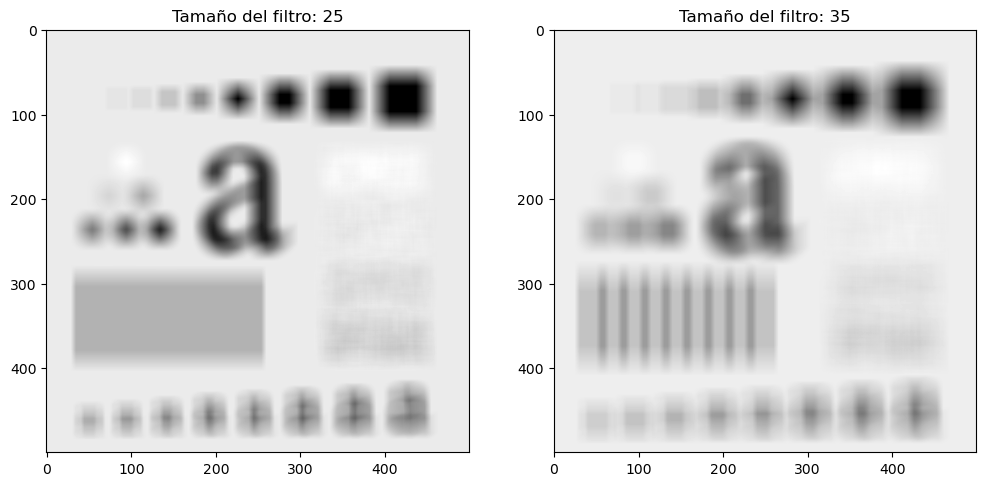

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(uniform_filter(img, 25), cmap='gray')
plt.title('Tamaño del filtro: 25')

plt.subplot(122)
plt.imshow(uniform_filter(img, 35), cmap='gray')
plt.title('Tamaño del filtro: 35')

Text(0.5, 1.0, 'Tamaño del filtro: 55')

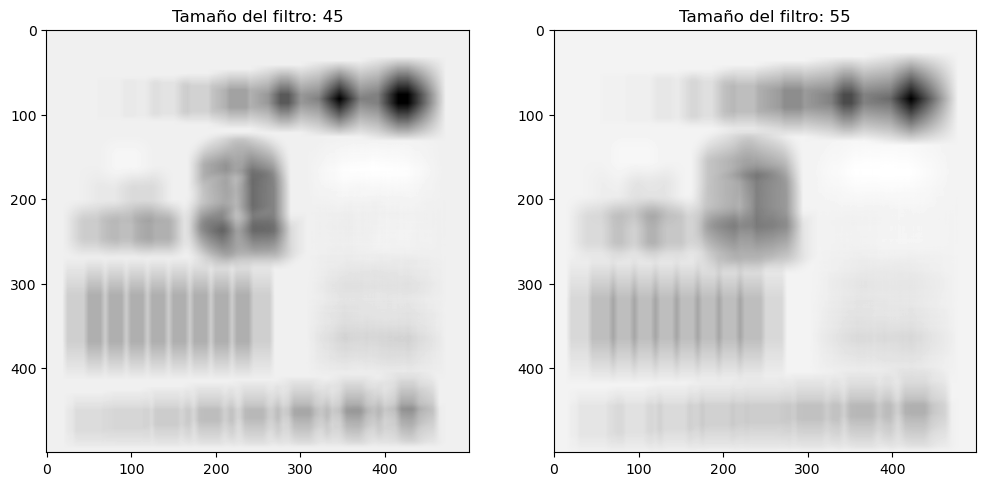

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(uniform_filter(img, 45), cmap='gray')
plt.title('Tamaño del filtro: 45')

plt.subplot(122)
plt.imshow(uniform_filter(img, 55), cmap='gray')
plt.title('Tamaño del filtro: 55')

### Filtrado Gaussiano

Se utiliza como alternativa al filtrado uniforme para reducir el rizado

Text(0.5, 1.0, 'Desviación típica: 5')

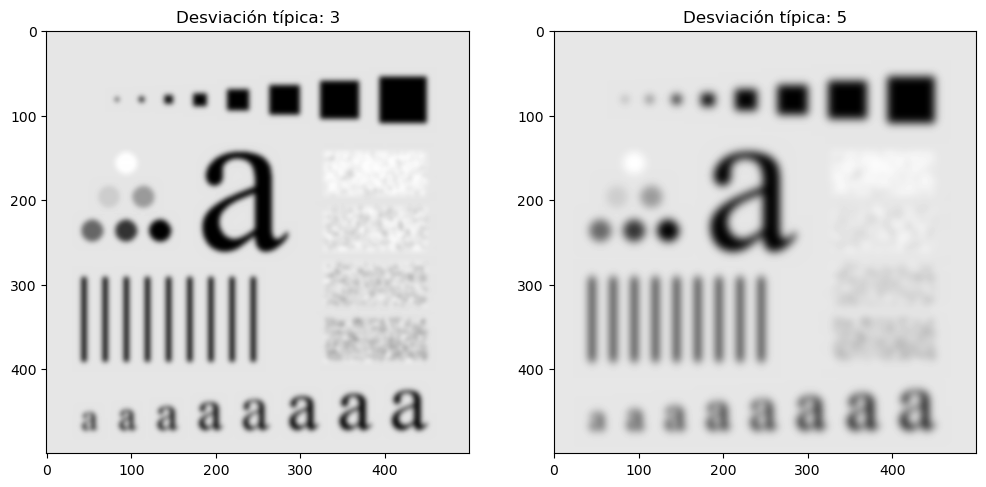

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(gaussian_filter(img, 3), cmap='gray')
plt.title('Desviación típica: 3')

plt.subplot(122)
plt.imshow(gaussian_filter(img, 5), cmap='gray')
plt.title('Desviación típica: 5')

## Ejercicio

Extraer los objetos principales de la siguiente imagen del fondo del cosmos tomada por el Observatorio Espacial Hubble

formato: TIFF
(ancho, alto) = (485, 528)
modo:  L


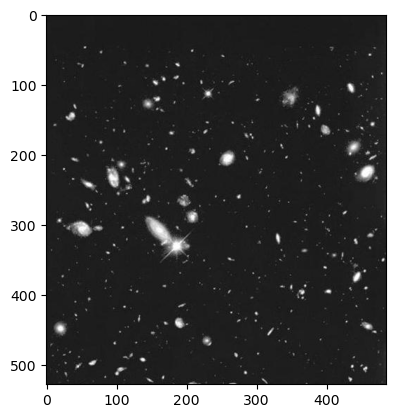

In [17]:
file = 'images/hubble.tif'
img  = Image.open(file)

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

plt.imshow(img, cmap='gray')

## Limitaciones del filtrado lineal y filtros no lineales

Intentemos eliminar el ruido "sal y pimienta" de la siguiente imagen con un filtro uniforme o con uno gaussiano. ¿Qué pasa?

formato: TIFF
(ancho, alto) = (455, 440)
modo:  L


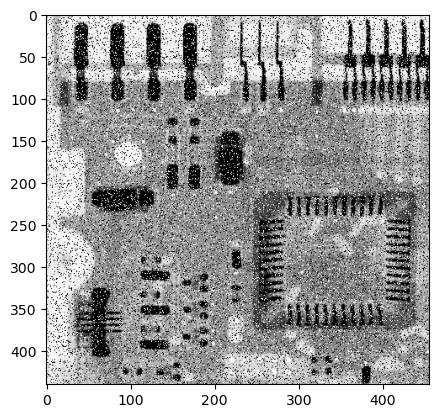

In [18]:
file = 'images/salted_board.tif'
img  = Image.open(file)

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

plt.imshow(img, cmap='gray')

Text(0.5, 1.0, 'F. Gaussiano - Desviación típica: 1')

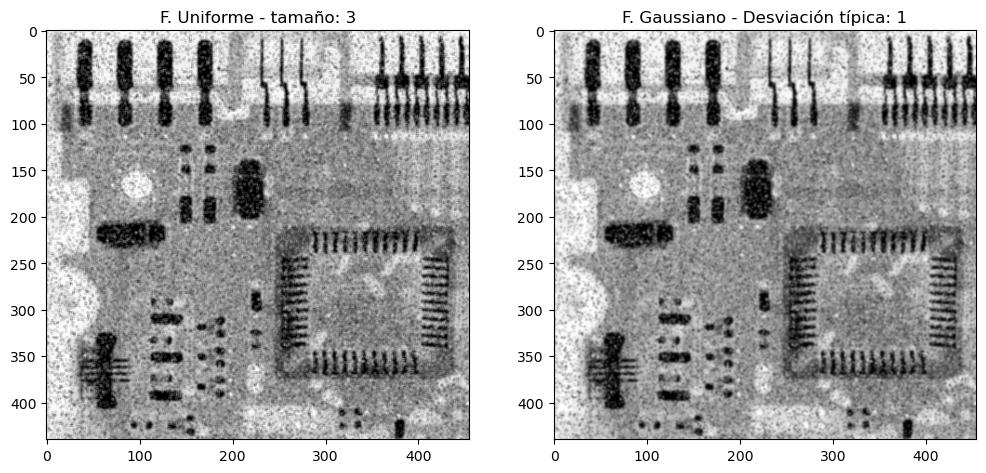

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(uniform_filter(img, 3), cmap='gray')
plt.title('F. Uniforme - tamaño: 3')

plt.subplot(122)
plt.imshow(gaussian_filter(img, 1), cmap='gray')
plt.title('F. Gaussiano - Desviación típica: 1')

Utilizaremos ahora un filtro de mediana

Text(0.5, 1.0, 'F. Mediana - tamaño: 3')

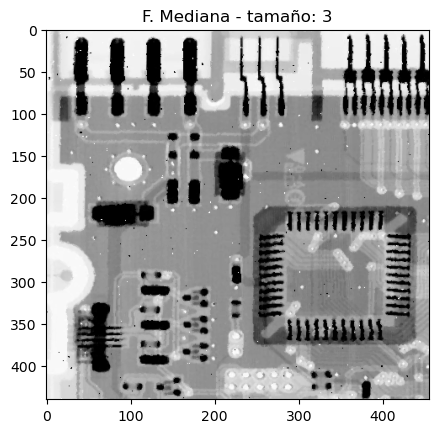

In [20]:
plt.imshow(median_filter(img, 3), cmap='gray')
plt.title('F. Mediana - tamaño: 3')

## Operadores de gradiente

### Filtros de Prewitt, de Sobel, y Derivada de Gaussiana 

In [21]:
from scipy.ndimage import prewitt, sobel, laplace

formato: TIFF
(ancho, alto) = (500, 500)
modo:  L


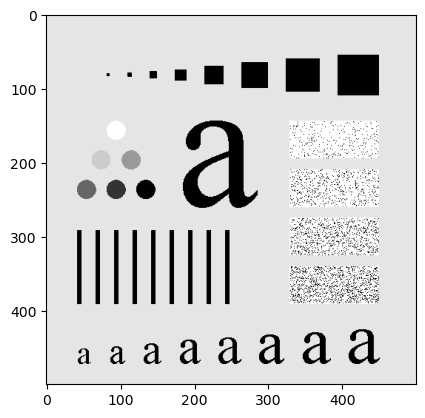

In [22]:
file = 'images/blurring_pattern.tif'
img  = Image.open(file)

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

plt.imshow(img, cmap='gray')

Text(0.5, 1.0, 'Sobel')

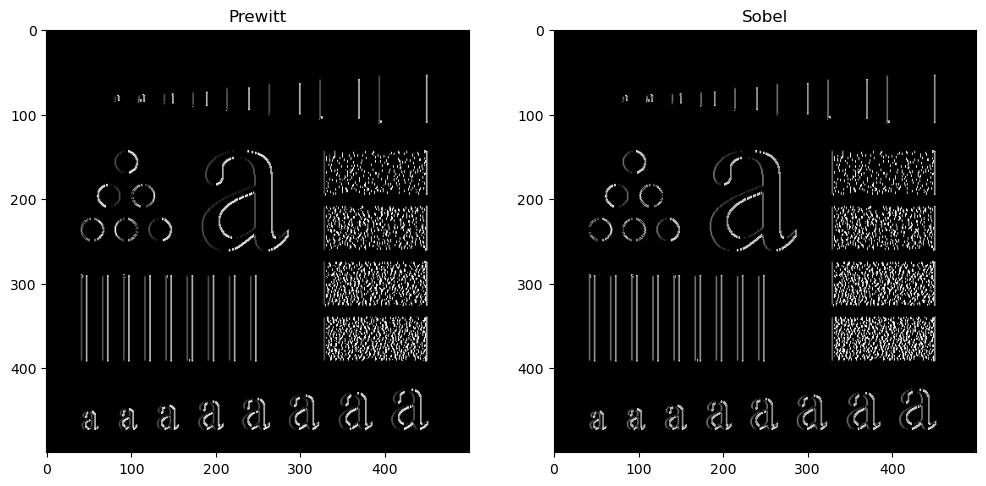

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(prewitt(img), cmap='gray')
plt.title('Prewitt')

plt.subplot(122)
plt.imshow(sobel(img), cmap='gray')
plt.title('Sobel')

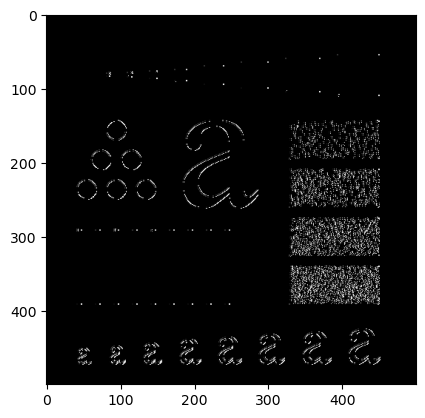

In [24]:
plt.imshow(gaussian_filter(img, 0.4, 1), cmap='gray')

## Segundas derivadas: Laplacianas

formato: TIFF
(ancho, alto) = (466, 540)
modo:  L


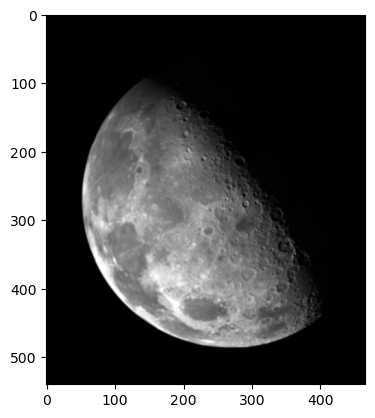

In [41]:
file = 'images/moon.tif'
img  = Image.open(file)

print('formato:', img.format)
print('(ancho, alto) =', img.size)
print('modo: ', img.mode)

plt.imshow(img, cmap='gray')

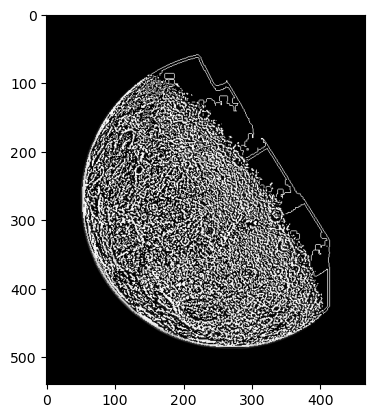

In [42]:
plt.imshow(laplace(img), cmap='gray')

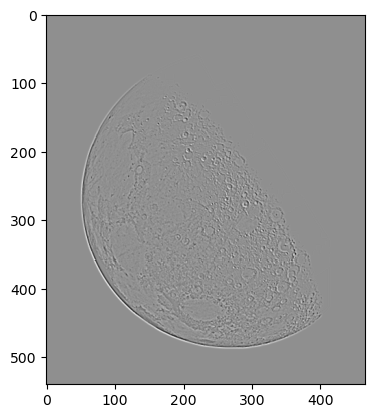

In [43]:
img_f = np.array(img).astype('float')
img_lpl = laplace(img_f)

plt.imshow(img_lpl, cmap='gray')

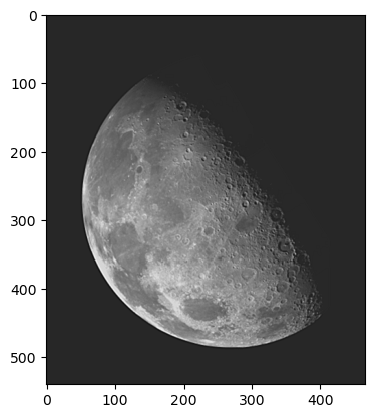

In [51]:
alpha=1 #Cambiar valor de alpha para ver efecto
img_realz = img_f - alpha*img_lpl

plt.imshow(img_realz, cmap='gray')

Text(0.5, 1.0, 'Realzada')

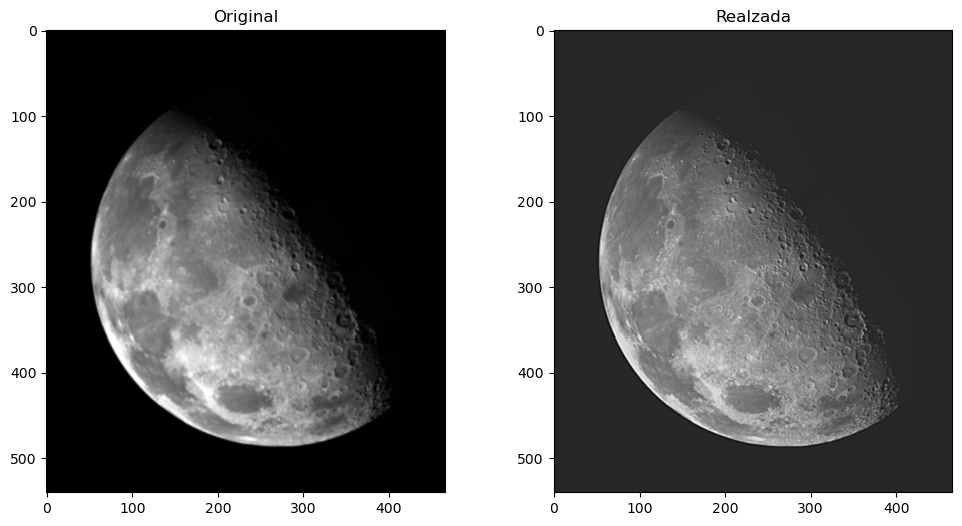

In [52]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(img_f, cmap='gray')
plt.title('Original')

plt.subplot(122)
plt.imshow(img_realz, cmap='gray')
plt.title('Realzada')